In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime

# Load data from CSV
data = pd.read_csv("filled_data.csv",parse_dates=['Date'])


2024-03-26 06:37:27.453085: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-26 06:37:27.456276: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-26 06:37:27.493129: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-03-26 06:37:28.717230: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# pip install pandas numpy tensorflow keras scikit-learn


In [3]:
data["Date"]=pd.to_datetime(data['Date'],dayfirst=True)

In [4]:
train=data[data['Date']<'2019-01-01']
test=data[data['Date']>='2019-01-01']

In [5]:
train.shape

(5479, 9)

In [6]:
test.shape

(365, 9)

In [7]:
features = [
    "Modal Price (Rs./Quintal)",
    "Rel Humidity at 2 Meters (%) ",
    "Precipitation Corrected (mm/day) ",
    "Surface Soil Wetness",
    "Root Zone Soil Wetness",
    "Temperature at 2 Meters",
]
target = "Modal Price (Rs./Quintal)"

In [8]:
# python -m pip install flask

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler=MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(train[features])
y_train=target_scaler.fit_transform(np.array(train[target]).reshape(-1, 1))

In [10]:
X_test=scaler.transform(test[features])
y_test=target_scaler.transform(np.array(test[target]).reshape(-1,1))

In [11]:
X_test.shape

(365, 6)

In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i : (i + look_back), :])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


look_back = 60  # Adjust this based on your data and experiment

X_train_seq, y_train_seq = create_sequences(X_train, look_back)
X_test_seq, y_test_seq = create_sequences(X_test, look_back)

# Define and train the LSTM model
model = Sequential()
model.add(
    LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]))
)  # Adjust units (50) based on your data and experiment
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test_seq))

# Make predictions on test data
y_pred = model.predict(X_test_seq)



Epoch 1/20


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6:21 2s/step - loss: 0.1990

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1847

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1581

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1401

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1268

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1163

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1078

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1005

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0943

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0889

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0841

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0799

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0761

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0728

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0697

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0669

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0644

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0620

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0599

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0579

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0561

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0544

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0528

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0513

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0499

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0486

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0473

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0462

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0451

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0440

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0430

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0421

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0412

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0403

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0395

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0387

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0380

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0373

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0366

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0360

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0353

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0347

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0341

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0336

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0330

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0325

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0320

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0315

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0311

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0306

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0302

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0298

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0294

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0290

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0286

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0282

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0278

170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0276 - val_loss: 0.0013


Epoch 2/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 6.2543e-04

  3/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 6.5705e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 6.8725e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.9664e-04

 12/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 7.0744e-04

 15/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 7.1488e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 7.1401e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 7.0442e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.9690e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.9405e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.8920e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.8323e-04

 35/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.7928e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.7395e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.7564e-04

 44/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.8164e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.8640e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.8981e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.9173e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.9313e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.9411e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.9423e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.9405e-04

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.9361e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.9328e-04

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.9270e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.9178e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.9106e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.9028e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.8947e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.8854e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.8737e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.8620e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.8525e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.8424e-04

104/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.8322e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.8221e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.8120e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.8003e-04

116/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.7877e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.7746e-04

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.7603e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.7497e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.7393e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.7290e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.7184e-04

137/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.7071e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.6952e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.6825e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.6701e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.6584e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.6478e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.6375e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.6268e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.6164e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.6066e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.5969e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.5869e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 6.5836e-04 - val_loss: 0.0012


Epoch 3/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 7.1851e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0010    

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 9.3159e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 9.0779e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 8.7930e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 8.4993e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 8.2912e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 8.0616e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.8384e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.6605e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.5009e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.3825e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.2811e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.1854e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.0981e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.0126e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.9285e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.8497e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.7730e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.6991e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.6413e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.5871e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.5369e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.4895e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.4430e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.3979e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.3535e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.3128e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.2762e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.2427e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.2085e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.1753e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.1446e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.1175e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.0904e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.0650e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.0403e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.0163e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.9969e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.9800e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.9645e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.9493e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.9349e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.9221e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.9102e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8997e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8900e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8799e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8694e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8592e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8505e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8423e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8343e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8267e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8187e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8103e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8015e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.7958e-04 - val_loss: 0.0011


Epoch 4/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 2.5592e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.3626e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.5921e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.4058e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.1849e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.9562e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.8149e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.7113e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.6074e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.5193e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.4524e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.3928e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.3451e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.3223e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.2970e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.2716e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.2472e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.2249e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.2036e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.1802e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.1571e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.1431e-04

 66/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.1224e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.1049e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.0903e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.0763e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.0674e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.0582e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.0503e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0407e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0316e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0230e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0146e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0096e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0064e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0035e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0010e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0007e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9999e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9996e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9987e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9971e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9948e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9919e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9892e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9862e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9828e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9792e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9757e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9723e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9689e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9655e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9618e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9578e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9534e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9486e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.9434e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 4.9377e-04 - val_loss: 9.2008e-04


Epoch 5/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 1.3347e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.7184e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.0719e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6593e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.0538e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.3164e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4511e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.5353e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6079e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6707e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7159e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7407e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.7563e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7722e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7857e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7934e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7992e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8009e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8074e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8140e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8197e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8232e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8232e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8234e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8241e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8261e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8304e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8343e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8407e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8517e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8633e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8739e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.8846e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.8944e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.9070e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.9216e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9353e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.9476e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.9597e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9704e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9799e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9889e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9966e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.0037e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.0100e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.0157e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.0205e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.0233e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.0258e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.0277e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.0304e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.0324e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.0345e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.0365e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.0385e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.0408e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.0432e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.0456e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 4.0473e-04 - val_loss: 0.0011


Epoch 6/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 5.3624e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.4541e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.1407e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.0331e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.9750e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.9492e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.9519e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.9526e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.9818e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.0210e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.0371e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.0824e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.1285e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.1660e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.1886e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.2004e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.2008e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.1969e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.1888e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.1762e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.1618e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.1461e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.1318e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.1189e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.1062e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.0944e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.0845e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.0730e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0611e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0500e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0412e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0322e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0250e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0176e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0106e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0044e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9983e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9922e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9855e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9800e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9764e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9727e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9687e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9647e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9612e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9588e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9564e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9540e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9513e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9481e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9451e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9430e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9406e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9378e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9346e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9315e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.9290e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.9272e-04 - val_loss: 8.1009e-04


Epoch 7/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 6.1983e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.4075e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.2694e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.1493e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9801e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.8624e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.7681e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6993e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6460e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.5999e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.5679e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.5439e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.5375e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.5280e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.5158e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.5040e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.4899e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.4726e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.4526e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.4383e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.4226e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.4103e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.3950e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.3774e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.3592e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.3414e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.3255e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.3113e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2969e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2816e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2691e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2571e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2450e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2338e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2230e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2122e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2032e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1971e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1908e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1849e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1787e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1727e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.1671e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.1613e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.1573e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.1511e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.1448e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.1387e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.1329e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.1267e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.1205e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.1143e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.1083e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.1037e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.0997e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.0961e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.0924e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 4.0889e-04 - val_loss: 7.8310e-04


Epoch 8/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 2.0205e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5889e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4570e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6837e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8481e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.9201e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.9217e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.9150e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.9012e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8953e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8865e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8704e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8455e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8132e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7804e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7514e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7262e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7056e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6878e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6693e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6501e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6312e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6128e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5943e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5762e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5591e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5428e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5324e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5221e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5113e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5005e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4903e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4802e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4705e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4611e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4553e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4466e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4386e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4312e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4234e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4165e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4112e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4063e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4023e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3982e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3943e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3917e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3907e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3908e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3917e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3930e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3939e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3948e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3952e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3956e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3962e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3971e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.3987e-04 - val_loss: 9.0934e-04


Epoch 9/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 3.5854e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 4.8162e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.5401e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.3638e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.2508e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.1902e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.1446e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.1348e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.1181e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.0947e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.0680e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.0355e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.0003e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.9686e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.9521e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.9421e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.9343e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.9272e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.9186e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.9099e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.9027e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8942e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8850e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8782e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.8674e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.8558e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.8428e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.8286e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.8145e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.8016e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.7882e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.7752e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.7616e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.7484e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.7370e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.7285e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7231e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7200e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7176e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7155e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.7136e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7110e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7084e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7058e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7040e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7022e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7001e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6975e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6946e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6916e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6882e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6844e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6806e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6768e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6729e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6693e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6662e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.6633e-04 - val_loss: 0.0015


Epoch 10/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 7.3762e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.6976e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.1840e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.8504e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.6239e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.4715e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.3689e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.2497e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.1370e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.0481e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9669e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.8988e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.8372e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.7773e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.7182e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6639e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6105e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.5625e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.5214e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.4823e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.4438e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.4058e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.3693e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.3354e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.3026e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.2706e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.2406e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.2113e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1826e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1540e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1265e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0997e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0738e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0491e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0256e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0051e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9847e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.9646e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.9467e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.9296e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.9137e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.9034e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.8889e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.8754e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.8676e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.8560e-04

137/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.8454e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.8348e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.8245e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.8147e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.8054e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.7962e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.7877e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.7793e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.7709e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.7624e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.7541e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.7458e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.7431e-04 - val_loss: 4.5487e-04


Epoch 11/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 2.2324e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.8064e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.1402e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.2222e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.1904e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.1782e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.1721e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.1907e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.2564e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.3336e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.4049e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.4770e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.5388e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.5863e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.6230e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.6524e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.6724e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.6863e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.6973e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.7027e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.7074e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.7151e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.7227e-04

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.7276e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.7294e-04

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.7274e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.7232e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.7173e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.7097e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.7030e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6967e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6911e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6844e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6776e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6710e-04

104/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6648e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6599e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6566e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6537e-04

116/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6517e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6495e-04

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6471e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6446e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6421e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6400e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6377e-04

137/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6358e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6342e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6333e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6330e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6329e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6334e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6342e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6350e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6357e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6361e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6362e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6359e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.6357e-04 - val_loss: 4.2391e-04


Epoch 12/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 2.7764e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.8529e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9267e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.8674e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.8459e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.8119e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7781e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7338e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6978e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6684e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6568e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6484e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6504e-04

 39/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6534e-04

 42/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.6605e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6635e-04

 48/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6650e-04

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6663e-04

 54/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6694e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6747e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6775e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6793e-04

 66/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6813e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6888e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6973e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7050e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7126e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7186e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7235e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7275e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7310e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7341e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7374e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7408e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7442e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7486e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7539e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7595e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7650e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7699e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7760e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7820e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7879e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.7937e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.7988e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.8037e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.8088e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.8137e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.8188e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.8240e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.8291e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.8332e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.8380e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.8427e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.8472e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.8514e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.8552e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.8586e-04 - val_loss: 5.9119e-04


Epoch 13/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 1.3259e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.9769e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1272e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.2145e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.2144e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1921e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1676e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1568e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1564e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1755e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1903e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2028e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2131e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2223e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2365e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2545e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2734e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2908e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3036e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3171e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3291e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3436e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3567e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3696e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3867e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4035e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4200e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4365e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4522e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4663e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4795e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4920e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5036e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5147e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5246e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5342e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5463e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5593e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5734e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5875e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6007e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6132e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6244e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6342e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6434e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6519e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6597e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6672e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6744e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6809e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6869e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6924e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6975e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7023e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7070e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7113e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7154e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.7180e-04 - val_loss: 4.2775e-04


Epoch 14/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 2.4160e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6755e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9917e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1168e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1491e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1456e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1233e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0828e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0397e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9988e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9583e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9228e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8913e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8653e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8398e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8168e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7963e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7783e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7636e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7546e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7462e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7369e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7271e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7194e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7130e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7067e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7014e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6974e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6941e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6904e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6870e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6829e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6790e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6749e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6733e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6738e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6742e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6741e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6735e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6729e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6721e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6723e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6723e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6720e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6721e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6724e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6726e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6731e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6734e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6738e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6741e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6744e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6750e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6761e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6777e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6791e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6811e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.6822e-04 - val_loss: 7.5350e-04


Epoch 15/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 2.2521e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2874e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4725e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4921e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4840e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4643e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4475e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4338e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4289e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4228e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4164e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.4140e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4205e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4283e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4409e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4524e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4691e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4838e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4957e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5062e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5164e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5257e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5345e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5411e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5479e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5531e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5574e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5615e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5670e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5714e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5746e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5769e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5782e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5792e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5801e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5807e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5817e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5822e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5822e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5822e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5823e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5820e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5817e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5816e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5817e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5828e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5835e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5842e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5853e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5871e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5889e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5904e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5919e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5931e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5947e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5967e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5988e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.6001e-04 - val_loss: 6.0921e-04


Epoch 16/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.5877e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0601e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1526e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1303e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0939e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0693e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0594e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0600e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0723e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0908e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1031e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1097e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1126e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1250e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1354e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1476e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1689e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1968e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2239e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2503e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2752e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3015e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3297e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3543e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3757e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3938e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4116e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4270e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4402e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4518e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4618e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4706e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4777e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4844e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4906e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4956e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5002e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5040e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5073e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5104e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5137e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5167e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5196e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5232e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5268e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5309e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5354e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5401e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5449e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5497e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5544e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5592e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5636e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5673e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5707e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5739e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5770e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.5792e-04 - val_loss: 5.9492e-04


Epoch 17/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 1.7952e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4385e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6803e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7926e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.8249e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.8536e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.8592e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8678e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8566e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.8375e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.8120e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7805e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7500e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7209e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6945e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6686e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6449e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6247e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.6063e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5893e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5730e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5570e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5433e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5334e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5249e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5176e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5113e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5055e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5003e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4965e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4946e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4939e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4922e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4907e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4894e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4877e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4864e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4849e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4841e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4827e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4813e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4808e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4811e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4815e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4817e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4823e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4828e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4831e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4835e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4841e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4850e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4858e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4864e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4871e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4878e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4881e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.4889e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.4898e-04 - val_loss: 5.8155e-04


Epoch 18/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 3.5517e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.3661e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.7029e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.7344e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.6606e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.5964e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.5341e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4741e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.4270e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3790e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3347e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2975e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2643e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2390e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2202e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2062e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2032e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2042e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2027e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1986e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1924e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1853e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1771e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1677e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1582e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1490e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1421e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1356e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1281e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1194e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1107e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1013e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0924e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0840e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0750e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0662e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0576e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0488e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0405e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0322e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0236e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0150e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0064e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9980e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9896e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9810e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9720e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9630e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9543e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9456e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9375e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9298e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9221e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9143e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9066e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8990e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8919e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.8872e-04 - val_loss: 3.4897e-04


Epoch 19/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 2.5891e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4650e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6973e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7675e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7819e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7979e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7951e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7745e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7945e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.8001e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7971e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7931e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7870e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.7790e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7718e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7664e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7589e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7510e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7409e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7290e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7163e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.7031e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6907e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6780e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6645e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6508e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6368e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6224e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6085e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5947e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5848e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5754e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5661e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5569e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5480e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5387e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5299e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5210e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5121e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5035e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4953e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4886e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4822e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4760e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4698e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4645e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4592e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4540e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4491e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4442e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4392e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4342e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4296e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4253e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4211e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4169e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.4127e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.4101e-04 - val_loss: 4.3689e-04


Epoch 20/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 1.3165e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.7204e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.8445e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.9471e-04

 12/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.9909e-04

 15/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.9974e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.0035e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.0296e-04

 23/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.0540e-04

 26/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.0833e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1028e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1257e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1461e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1588e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1725e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.1897e-04

 44/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.2062e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.2193e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.2266e-04

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.2404e-04

 54/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.2580e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2670e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2762e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2846e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2950e-04

 66/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.3045e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.3129e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.3199e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.3277e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.3357e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.3427e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.3490e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.3544e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3586e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3615e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3635e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3658e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3680e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3698e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3711e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3722e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3733e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3741e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3747e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3747e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3750e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3751e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3748e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3742e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3734e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3725e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3714e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3702e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3696e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3686e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3674e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3663e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3653e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3644e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3634e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.3622e-04 - val_loss: 3.8825e-04


 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step

 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [13]:
len(X_test)

365

In [14]:
y_pred = y_pred.reshape(-1)

In [15]:
y_pred_scaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_seq = y_test_seq.reshape(-1)
y_test_scaled = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1))


In [16]:
len(y_pred_scaled)

304

In [17]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test_scaled, y_pred_scaled, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 84.65


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
y_pred_scaled[0]

array([3531.9717], dtype=float32)

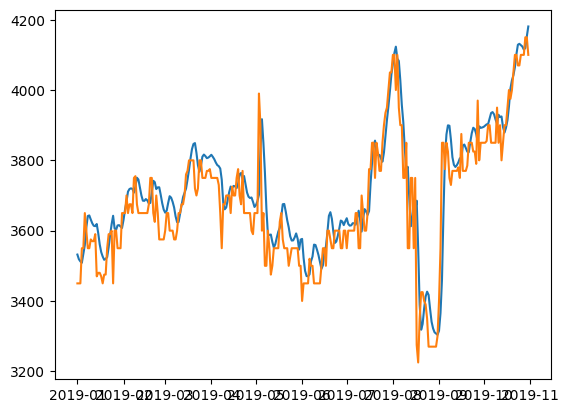

In [19]:
import matplotlib.pyplot as plt
plt.plot(test['Date'][0:304],y_pred_scaled.reshape(-1))
plt.plot(test['Date'][0:304],y_test_scaled.reshape(-1))

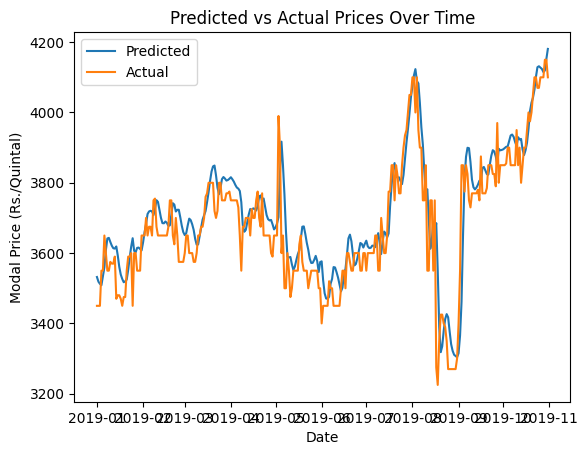

In [20]:

# Define the date range for plotting
date_range = test['Date'].iloc[:len(y_pred_scaled)]

# Plot the predictions against the actual values over time
plt.plot(date_range, y_pred_scaled, label='Predicted')
plt.plot(date_range, y_test_scaled, label='Actual')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time')
plt.legend()

# Show plot
plt.show()

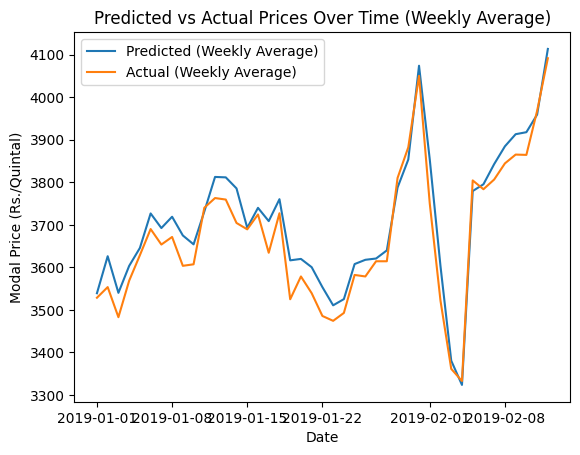

In [21]:
# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)


# Plot the weekly average predictions against the actual values
plt.plot(test['Date'][:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test['Date'][:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()
plt.savefig("static/my_plot1.png")
# Show plot
plt.show()

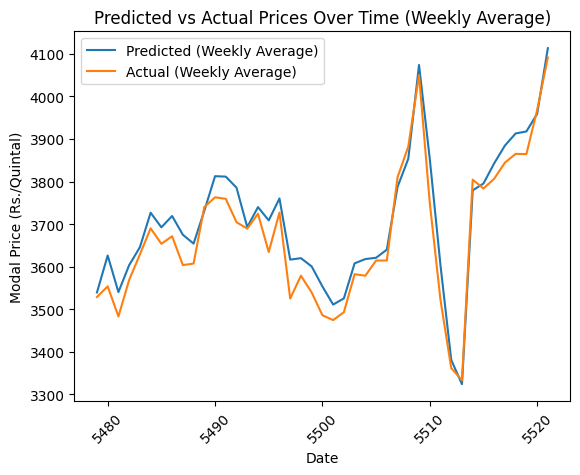

In [22]:

# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)

# Plot the weekly average predictions against the actual values
plt.plot(test.index[:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test.index[:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.savefig('static/my_plot.png')
# Show plot
plt.show()

In [23]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import row, column
from bokeh.models.widgets import TextInput
from bokeh.models import CustomJS

# Define Bokeh plots
plot1 = figure(title="Predicted vs Actual Prices Over Time",
               x_axis_label='Date',
               y_axis_label='Modal Price (Rs./Quintal)',
               x_axis_type='datetime')

plot2 = figure(title="Predicted vs Actual Prices Over Time (Weekly Average)",
               x_axis_label='Date',
               y_axis_label='Modal Price (Rs./Quintal)',
               x_axis_type='datetime')

# Add data to plots
source1 = ColumnDataSource(data=dict(date=test['Date'][:len(y_pred_scaled)],
                                     predicted=y_pred_scaled.reshape(-1),
                                     actual=y_test_scaled.reshape(-1)))
plot1.line(x='date', y='predicted', source=source1, legend_label='Predicted', color='blue')
plot1.line(x='date', y='actual', source=source1, legend_label='Actual', color='orange')

source2 = ColumnDataSource(data=dict(date=test['Date'][:len(y_pred_weekly)],
                                     predicted_weekly=y_pred_weekly,
                                     actual_weekly=y_test_weekly))
plot2.line(x='date', y='predicted_weekly', source=source2, legend_label='Predicted (Weekly Average)', color='blue')
plot2.line(x='date', y='actual_weekly', source=source2, legend_label='Actual (Weekly Average)', color='orange')

# Add hover tooltips
hover_tool1 = HoverTool(tooltips=[("Date", "@date{%F}"), ("Predicted", "@predicted"), ("Actual", "@actual")],
                        formatters={"@date": "datetime"})
plot1.add_tools(hover_tool1)

hover_tool2 = HoverTool(tooltips=[("Date", "@date{%F}"), ("Predicted", "@predicted_weekly"), ("Actual", "@actual_weekly")],
                        formatters={"@date": "datetime"})
plot2.add_tools(hover_tool2)

# Define dashboard layout
dashboard_layout = column(plot1, plot2)

# Save and show the dashboard
output_file("index.html")
show(dashboard_layout)
